In [ ]:
# 얼마 시간을 소요하지도 않았지만 막상 스스로 하려니 어떠한 것을 비교해서 유의미한 값을 얻을지 insight가 부족한듯
# 목표와는 다르게 별의미없는 값들만 나열, but 실제로 코드를 구현했다는 것에 만족.....

# 어떠한 상관관계 있는지 분석 (교통사고발생과 날씨, 시간 등 어떠한 관계가 있을까??)

In [1]:
#필요 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#한글설정

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [3]:
#데이터 불러오기
df=pd.read_csv('C:/Users/inha/Desktop/전국_사망교통사고정보(2018).csv',encoding='cp949') #encoding은 cp949
df.head()

,발생년,발생년월일시분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2018,2018-02-14 6:35,주,수,1,1,0,0,0,서울,...,단일로,기타단일로,승용차,승용차,보행자,보행자,950497.0,1954702.0,126.939274,37.590388
1,2018,2018-09-02 5:23,야,일,1,1,0,0,0,서울,...,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,953337.0,1950150.0,126.971732,37.549508
2,2018,2018-12-15 22:35,야,토,1,1,0,0,0,서울,...,단일로,기타단일로,이륜차,이륜차,없음,없음,956967.0,1954807.0,127.012552,37.591659
3,2018,2018-08-23 11:30,주,목,1,1,0,0,0,서울,...,단일로,기타단일로,승합차,승합차,없음,없음,958020.0,1959193.0,127.024227,37.631240
4,2018,2018-07-16 0:50,야,월,1,1,0,0,0,서울,...,교차로,교차로횡단보도내,화물차,화물차,보행자,보행자,957606.0,1958258.0,127.019590,37.622794


# 데이터 형태 파악

In [4]:
df.shape #3657개의 샘플 26개의 피쳐

(3657, 26)

In [5]:
df.info()  #결측치 없고 자료 형태 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   발생년            3657 non-null   int64  
 1   발생년월일시분        3657 non-null   object 
 2   주야             3657 non-null   object 
 3   요일             3657 non-null   object 
 4   사망자수           3657 non-null   int64  
 5   사상자수           3657 non-null   int64  
 6   중상자수           3657 non-null   int64  
 7   경상자수           3657 non-null   int64  
 8   부상신고자수         3657 non-null   int64  
 9   발생지시도          3657 non-null   object 
 10  발생지시군구         3657 non-null   object 
 11  사고유형_대분류       3657 non-null   object 
 12  사고유형_중분류       3657 non-null   object 
 13  사고유형           3657 non-null   object 
 14  법규위반_대분류       3657 non-null   object 
 15  법규위반           3657 non-null   object 
 16  도로형태_대분류       3657 non-null   object 
 17  도로형태           3657 non-null   object 
 18  가해자_당사자종

In [6]:
df.describe()

,발생년,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
count,3657.0,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3.657000e+03,3.657000e+03,3657.000000,3657.000000
mean,2018.0,1.033908,1.557561,0.220399,0.277550,0.025704,1.005988e+06,1.817367e+06,127.564288,36.350459
std,0.0,0.231419,1.646903,0.733751,1.098448,0.260230,7.829082e+04,1.183245e+05,0.868589,1.067857
min,2018.0,1.000000,1.000000,0.000000,0.000000,0.000000,8.567940e+05,1.470725e+06,125.936161,33.221528
25%,2018.0,1.000000,1.000000,0.000000,0.000000,0.000000,9.456370e+05,1.720625e+06,126.895036,35.472360
50%,2018.0,1.000000,1.000000,0.000000,0.000000,0.000000,9.749880e+05,1.823164e+06,127.220528,36.403647
75%,2018.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.076253e+06,1.928830e+06,128.346943,37.358135
max,2018.0,8.000000,39.000000,13.000000,29.000000,10.000000,1.293632e+06,2.049835e+06,130.820632,38.445604


In [7]:
df.columns

Index(['발생년', '발생년월일시분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류', '법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별_대분류', '가해자_당사자종별', '피해자_당사자종별_대분류',
       '피해자_당사자종별', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

# 쓸모없는 feature 삭제

In [8]:
#이번 분석에서 삭제할 feature

#1'가해자_당사자종별'
#2'피해자_당사자종별'
#3'도로형태'
#4'법규위반_대분류'
#5'사고유형_중분류'
#6'사고유형'
#7'발생위치X_UTMK'
#8'발생위치Y_UTMK'

In [9]:
df.drop(['가해자_당사자종별','피해자_당사자종별','도로형태','법규위반_대분류','사고유형_중분류','사고유형','발생위치X_UTMK','발생위치Y_UTMK'],axis=1,inplace=True)
df.shape #8개의 feature제거 

(3657, 18)

In [10]:
df.head()

,발생년,발생년월일시분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,법규위반,도로형태_대분류,가해자_당사자종별_대분류,피해자_당사자종별_대분류,경도,위도
0,2018,2018-02-14 6:35,주,수,1,1,0,0,0,서울,서대문구,차대사람,안전운전 의무 불이행,단일로,승용차,보행자,126.939274,37.590388
1,2018,2018-09-02 5:23,야,일,1,1,0,0,0,서울,용산구,차대사람,안전운전 의무 불이행,교차로,승용차,보행자,126.971732,37.549508
2,2018,2018-12-15 22:35,야,토,1,1,0,0,0,서울,성북구,차량단독,안전운전 의무 불이행,단일로,이륜차,없음,127.012552,37.591659
3,2018,2018-08-23 11:30,주,목,1,1,0,0,0,서울,강북구,차량단독,기타(운전자법규위반),단일로,승합차,없음,127.024227,37.631240
4,2018,2018-07-16 0:50,야,월,1,1,0,0,0,서울,강북구,차대사람,안전운전 의무 불이행,교차로,화물차,보행자,127.019590,37.622794


In [11]:
#주간별,요일별, 법규위반별, 가해자_당사자종별_대분류,피해자_당사자종별_대분류 사망자 수

df.groupby(['법규위반','가해자_당사자종별_대분류','피해자_당사자종별_대분류'])['사망자수'].agg(['count','mean'])

#승용차와 보행자 사망자 수가 제일 많군.....

count  mean
법규위반          가해자_당사자종별_대분류 피해자_당사자종별_대분류             
과속            건설기계          승용차                1   1.0
              승용차           건설기계               1   1.0
                            농기계                6   1.0
                            보행자              128   1.0
                            사륜오토바이(ATV)        1   1.0
...                                          ...   ...
차로위반(진로변경 위반) 이륜차           이륜차                1   1.0
              화물차           승용차                2   1.0
                            이륜차                1   1.0
철길건널목 통과방법위반  이륜차           기타                 1   1.0
              화물차           기타                 1   1.0

[331 rows x 2 columns]

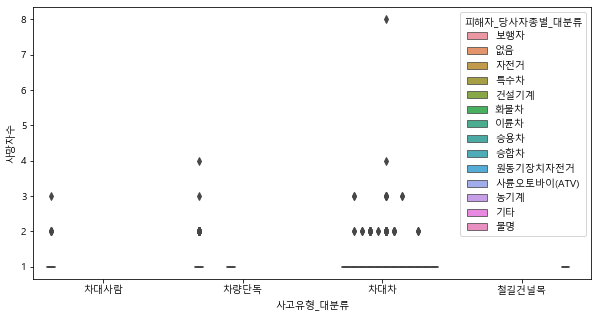

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='사고유형_대분류',y='사망자수',hue='피해자_당사자종별_대분류')

In [13]:
#상관관계 분석

columns=['발생년', '발생년월일시분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류',  '법규위반',
       '도로형태_대분류', '가해자_당사자종별_대분류', '피해자_당사자종별_대분류',
        '경도', '위도']
columns

['발생년',
 '발생년월일시분',
 '주야',
 '요일',
 '사망자수',
 '사상자수',
 '중상자수',
 '경상자수',
 '부상신고자수',
 '발생지시도',
 '발생지시군구',
 '사고유형_대분류',
 '법규위반',
 '도로형태_대분류',
 '가해자_당사자종별_대분류',
 '피해자_당사자종별_대분류',
 '경도',
 '위도']

In [14]:
# 여러 칼럼들이 안나온다 왜그러지??
# 문자열이라 안나오는건가? 한번 수치형으로 변환 해보자 
# 위의 가정이 맞을거 같은데 수치형으로 하기에는 데이터가 애초에 한글이라 어떻게 변환할지 나중에 고민을 해봐야할듯...

df_small=df[columns]
df_corr=df_small.corr()
df_corr

,발생년,사망자수,사상자수,중상자수,경상자수,부상신고자수,경도,위도
발생년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
사망자수,NaN,1.000000,0.313525,0.229816,0.106077,-0.000851,0.013495,-0.006992
사상자수,NaN,0.313525,1.000000,0.754782,0.873331,0.235240,0.012397,0.017910
중상자수,NaN,0.229816,0.754782,1.000000,0.401907,0.056271,0.012219,0.006108
경상자수,NaN,0.106077,0.873331,0.401907,1.000000,0.078378,0.011840,0.013843
부상신고자수,NaN,-0.000851,0.235240,0.056271,0.078378,1.000000,-0.017975,0.043913
경도,NaN,0.013495,0.012397,0.012219,0.011840,-0.017975,1.000000,-0.202943
위도,NaN,-0.006992,0.017910,0.006108,0.013843,0.043913,-0.202943,1.000000


In [15]:
df_corr['사망자수']

발생년            NaN
사망자수      1.000000
사상자수      0.313525
중상자수      0.229816
경상자수      0.106077
부상신고자수   -0.000851
경도        0.013495
위도       -0.006992
Name: 사망자수, dtype: float64

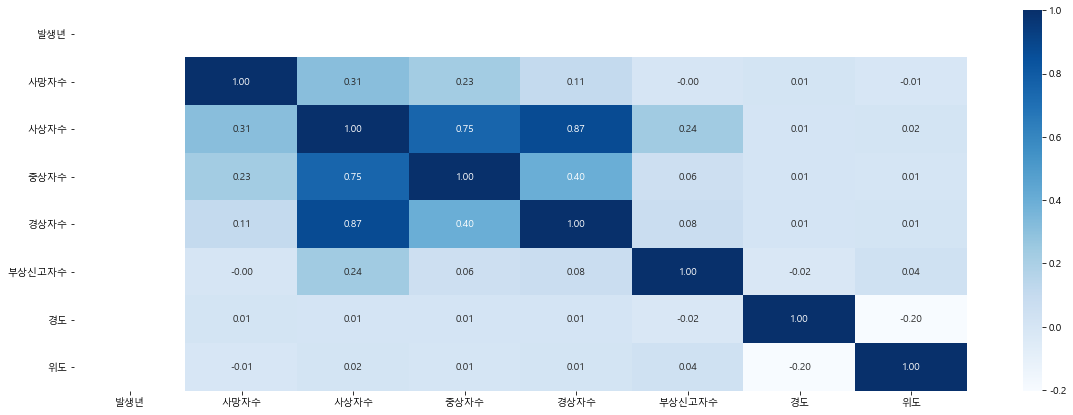

In [16]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='Blues')

In [17]:
#어떤 지시도 에서 많이 발생할까??
city=df['발생지시도'].value_counts()
city

경기    659
경북    393
충남    342
경남    320
전남    312
서울    300
전북    237
충북    219
강원    183
부산    121
대구    117
인천    111
대전     92
제주     81
울산     77
광주     76
세종     17
Name: 발생지시도, dtype: int64

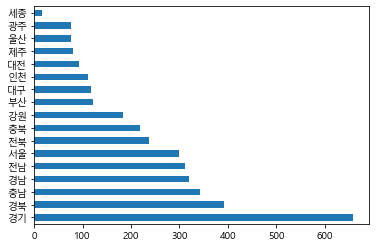

In [18]:
city.plot.barh() #경기지역이 많다..... 인천은 적은편 

In [19]:
#인천지역만 파악해보자....

df_incheon=df[df['발생지시도']=='인천'].copy()
df_incheon

,발생년,발생년월일시분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,법규위반,도로형태_대분류,가해자_당사자종별_대분류,피해자_당사자종별_대분류,경도,위도
356,2018,2018-12-18 19:50,야,화,1,1,0,0,0,인천,중구,차대사람,신호위반,교차로,승용차,보행자,126.635572,37.468199
357,2018,2018-10-20 11:30,주,토,1,1,0,0,0,인천,동구,차대차,안전운전 의무 불이행,단일로,이륜차,승용차,126.650808,37.478864
358,2018,2018-07-06 15:50,주,금,1,1,0,0,0,인천,중구,차량단독,안전운전 의무 불이행,단일로,자전거,없음,126.486556,37.484600
359,2018,2018-12-07 5:34,야,금,1,1,0,0,0,인천,남구,차대사람,안전운전 의무 불이행,단일로,화물차,보행자,126.644975,37.465707
360,2018,2018-08-27 5:05,야,월,1,4,1,2,0,인천,남구,차대차,과속,교차로,승합차,승용차,126.686591,37.458150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,2018,2018-09-26 2:00,야,수,1,1,0,0,0,인천,남동구,차대사람,신호위반,단일로,승용차,보행자,126.700557,37.446267
3597,2018,2018-09-12 9:09,주,수,1,1,0,0,0,인천,서구,차량단독,안전운전 의무 불이행,단일로,승용차,없음,126.682182,37.524540
3598,2018,2018-10-24 13:10,주,수,1,1,0,0,0,인천,강화군,차대차,안전운전 의무 불이행,기타,농기계,승합차,126.463493,37.765356
3599,2018,2018-10-29 19:27,야,월,1,1,0,0,0,인천,연수구,차대사람,안전운전 의무 불이행,교차로,승합차,보행자,126.687343,37.411655


In [20]:
df_incheon_count=df_incheon['발생지시군구'].value_counts()
df_incheon_count

서구     19
남구     17
연수구    16
중구     14
계양구    13
남동구    11
부평구    10
강화군     7
동구      2
옹진군     2
Name: 발생지시군구, dtype: int64

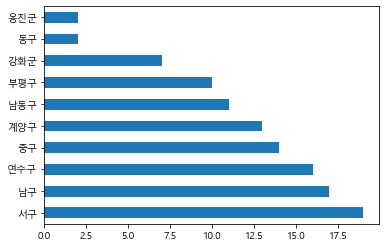

In [21]:
df_incheon_count.plot.barh()  #내가 사는 곳인 연수구는 인천에서 3번째로 많은 곳

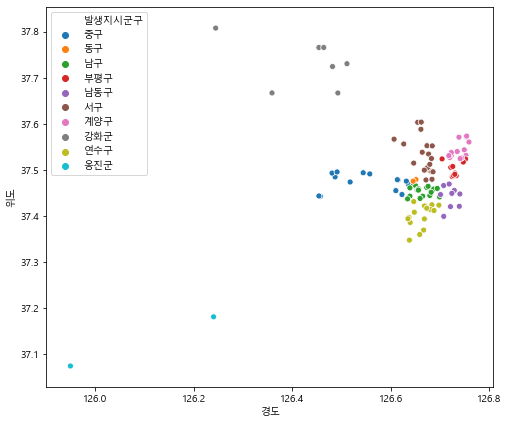

In [22]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='경도',y='위도',hue='발생지시군구',data=df_incheon)

In [23]:
import folium

map=folium.Map(location=[37.48748116333335,126.64428915225224]) #위도와 경도의 평균값을 대입.


for n in df_incheon.index:
    time = df_incheon.loc[n, "발생년월일시분"]
    violation = df_incheon.loc[n, "법규위반"]
    popup = f"{time}-{violation}"
    location = [df_incheon.loc[n, "위도"], df_incheon.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

In [24]:
df_incheon['위도'].mean(), df_incheon['경도'].mean()

(37.48748116333335, 126.64428915225224)

# 인천을 기준으로 데이터 분석을 해보자

In [25]:
df_incheon   #주야별 요일별 법규위반별  =사망자 수 구하기 

,발생년,발생년월일시분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,법규위반,도로형태_대분류,가해자_당사자종별_대분류,피해자_당사자종별_대분류,경도,위도
356,2018,2018-12-18 19:50,야,화,1,1,0,0,0,인천,중구,차대사람,신호위반,교차로,승용차,보행자,126.635572,37.468199
357,2018,2018-10-20 11:30,주,토,1,1,0,0,0,인천,동구,차대차,안전운전 의무 불이행,단일로,이륜차,승용차,126.650808,37.478864
358,2018,2018-07-06 15:50,주,금,1,1,0,0,0,인천,중구,차량단독,안전운전 의무 불이행,단일로,자전거,없음,126.486556,37.484600
359,2018,2018-12-07 5:34,야,금,1,1,0,0,0,인천,남구,차대사람,안전운전 의무 불이행,단일로,화물차,보행자,126.644975,37.465707
360,2018,2018-08-27 5:05,야,월,1,4,1,2,0,인천,남구,차대차,과속,교차로,승합차,승용차,126.686591,37.458150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,2018,2018-09-26 2:00,야,수,1,1,0,0,0,인천,남동구,차대사람,신호위반,단일로,승용차,보행자,126.700557,37.446267
3597,2018,2018-09-12 9:09,주,수,1,1,0,0,0,인천,서구,차량단독,안전운전 의무 불이행,단일로,승용차,없음,126.682182,37.524540
3598,2018,2018-10-24 13:10,주,수,1,1,0,0,0,인천,강화군,차대차,안전운전 의무 불이행,기타,농기계,승합차,126.463493,37.765356
3599,2018,2018-10-29 19:27,야,월,1,1,0,0,0,인천,연수구,차대사람,안전운전 의무 불이행,교차로,승합차,보행자,126.687343,37.411655


In [26]:
df_morning=df_incheon[(df_incheon[df_incheon['주야']=='주']) & (df_incheon[df_incheon['법규위반']=='신호위반'])]

df_morning #같은 object같은데 몬소리지....

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [27]:
df_incheon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 356 to 3600
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   발생년            111 non-null    int64  
 1   발생년월일시분        111 non-null    object 
 2   주야             111 non-null    object 
 3   요일             111 non-null    object 
 4   사망자수           111 non-null    int64  
 5   사상자수           111 non-null    int64  
 6   중상자수           111 non-null    int64  
 7   경상자수           111 non-null    int64  
 8   부상신고자수         111 non-null    int64  
 9   발생지시도          111 non-null    object 
 10  발생지시군구         111 non-null    object 
 11  사고유형_대분류       111 non-null    object 
 12  법규위반           111 non-null    object 
 13  도로형태_대분류       111 non-null    object 
 14  가해자_당사자종별_대분류  111 non-null    object 
 15  피해자_당사자종별_대분류  111 non-null    object 
 16  경도             111 non-null    float64
 17  위도             111 non-null    float64
dtypes: floa